# Entregable 4
## Modelos

### Regresión Lineal

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
mp=pd.read_csv('nmaxplanck.csv', index_col=0)
mp.shape

(12107, 16)

In [3]:
df=pd.DataFrame(mp)

In [4]:
df.head(3)

,idpers,idreg,idarea,año,nota1,nota2,nota3,nota4,nota5,nota6,nota7,Curso,bimestre,grado,nivel,Promedio
0,10500,1,22,2013,11,18,10,14,14,15,15,ALEM,1,1,PRIMARIA,13.857143
1,10500,2,12,2013,12,17,14,14,14,15,15,ALEM,1,1,PRIMARIA,14.428571
2,10500,3,26,2013,16,16,17,14,14,15,15,ALEM,1,1,PRIMARIA,15.285714


In [5]:
d1 = df.idpers
d2 = df.Promedio
d3 = df.Curso

datos=pd.concat([d1, d2, d3], axis=1)
datos.head(2)

,idpers,Promedio,Curso
0,10500,13.857143,ALEM
1,10500,14.428571,ALEM


Coefficients: 
 [[108.88029664]]
Mean squared error: 5731914.76
Variance score: 0.00
Precision model: 
0.003077606590285664


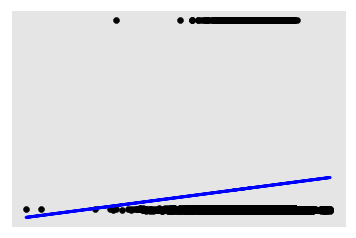

In [6]:
df_X = df.Promedio[:, np.newaxis]
df_y = df.idpers[:, np.newaxis]

df_X_train = df_X[:-20]
df_X_test = df_X[0:]


df_y_train = df_y[:-20]
df_y_test = df_y[0:] #df.Promedio[0:]

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))

print('Precision model: ')
print(regr.score(df_X_train, df_y_train))

# Plot outputs
plt.scatter(df_X_test, df_y_test,  color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Reglas de Asociación

In [11]:
alumno = df['idpers'].astype('str')
Promedio = df['Promedio'].astype('str')

In [12]:
Cursos = (df[df['año']==2013]
              .groupby(['idpers', 'Curso'])['Promedio']
              .sum().unstack().reset_index().fillna(0)
              .set_index('idpers'))

In [13]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(Cursos > 0, min_support=0.06, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.1,(ALEM)
1,0.1,(COMP)
2,0.5,(MUSC)
3,0.5,(PINT)
4,0.1,"(MUSC, ALEM)"


In [14]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALEM),(MUSC),0.1,0.5,0.1,1.0,2.0,0.05,inf


In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MUSC),(ALEM),0.5,0.1,0.1,0.2,2.0,0.05,1.125
1,(ALEM),(MUSC),0.1,0.5,0.1,1.0,2.0,0.05,inf


## Exportación

#### CSV, EXCEL, JSON, XML

In [14]:
# CSV
# mp=pd.read_csv('nmaxplanck.csv', index_col=0)
df.to_csv('exportacion.csv')

In [23]:
# Excel
df.to_excel('exportacion.xlsx')

In [25]:
# JSON
df.to_json('exportacion.json')

In [5]:
# XML
df.to_html('exportacion.html')